In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [40]:
data=pd.read_csv("mushroom.csv")

In [41]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [42]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [43]:
for col in data.columns:
    data[col]=lbl.fit_transform(data[col])

In [44]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [45]:
#separating x and y variables
y=data['class']
x=data.iloc[:,1:23]

In [46]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [47]:
from collections import Counter

In [48]:
Counter(y)

Counter({1: 3916, 0: 4208})

In [49]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [51]:
x_train.shape

(5686, 22)

In [52]:
y_train.shape

(5686,)

In [53]:
x_test.shape

(2438, 22)

In [54]:
y_test.shape

(2438,)

In [55]:
from sklearn.cluster import KMeans

In [56]:
k_means=KMeans(n_clusters=2)

In [57]:
k_means.fit(x_train, y_train)

KMeans(n_clusters=2)

In [58]:
k_means_predict=k_means.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [60]:
k_means_acc=accuracy_score(k_means_predict,y_test)

In [61]:
k_means_conf=confusion_matrix(k_means_predict,y_test)

In [62]:
k_means_acc

0.7042657916324856

In [63]:
k_means_conf

array([[1217,  659],
       [  62,  500]], dtype=int64)

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [65]:
fpr, tpr, thresholds=roc_curve(y_test, k_means_predict)

In [66]:
k_means_auc=auc(fpr,tpr)

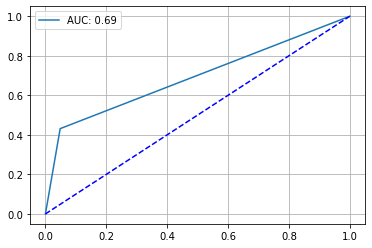

In [67]:
plt.plot(fpr,tpr,label='AUC: %0.2f' % k_means_auc)
plt.plot([0,1],[0,1],'b--')
plt.legend()
plt.grid()